**Report 4 TDD, CODE** - *Inés Sallent u199122*

Delta value: 0.13258252147247765
B values: [-2.05502908 -1.92244656 -1.78986404 -1.65728152 -1.524699   -1.39211648
 -1.25953395 -1.12695143 -0.99436891 -0.86178639 -0.72920387 -0.59662135
 -0.46403883 -0.3314563  -0.19887378 -0.06629126  0.06629126  0.19887378
  0.3314563   0.46403883  0.59662135  0.72920387  0.86178639  0.99436891
  1.12695143  1.25953395  1.39211648  1.524699    1.65728152  1.78986404
  1.92244656  2.05502908]
C values: [-0.99436891 -0.86178639 -0.72920387 -0.59662135 -0.46403883 -0.3314563
 -0.19887378 -0.06629126  0.06629126  0.19887378  0.3314563   0.46403883
  0.59662135  0.72920387  0.86178639  0.99436891]


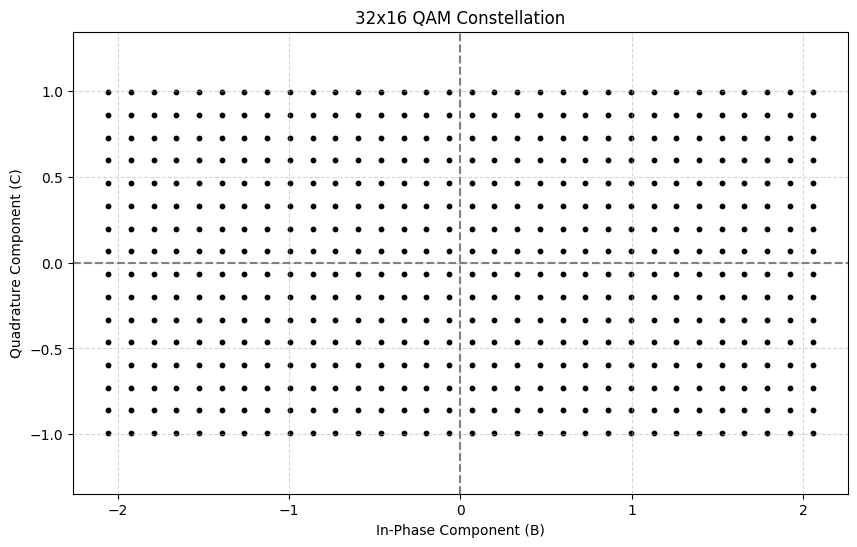

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
E_s = 9  # Energía promedio por símbolo
M = 32 * 16  # Número total de símbolos (32x16 QAM)

# Función para calcular la suma de la ecuación
def calculate_sum(Delta):
    B = np.arange(-31/2, 32/2) * Delta
    C = np.arange(-15/2, 16/2) * Delta
    return np.sum(np.abs(B[:, np.newaxis] + C[np.newaxis, :])**2)

# Calcular Delta iterativamente
Delta = np.sqrt(E_s / M)  # Valor inicial
for _ in range(100):
    sum_term = calculate_sum(Delta)
    new_Delta = np.sqrt(M * E_s / sum_term)
    if np.abs(new_Delta - Delta) < 1e-6:
        break
    Delta = new_Delta

print('Delta value:', Delta)

# Generar valores posibles para B y C
B = np.arange(-31/2, 32/2) * Delta   # 32 niveles (eje in-phase)
C = np.arange(-15/2, 16/2) * Delta   # 16 niveles (eje quadrature)

print('B values:', B)
print('C values:', C)

# Crear la cuadrícula de la constelación
B_grid, C_grid = np.meshgrid(B, C)
symbols = B_grid + 1j * C_grid  # Representación como números complejos


# Visualizar la constelación
plt.figure(figsize=(10, 6))
plt.scatter(symbols.real, symbols.imag, color='black', marker='o', s=10)
plt.title('32x16 QAM Constellation')
plt.xlabel('In-Phase Component (B)')
plt.ylabel('Quadrature Component (C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axis('equal')
plt.show()